# scANVI Explainer demo

date: 13-09-2024

author: Martin Proks

In [1]:
!which pip

~/projects/data/Brickman/conda/envs/scvi-1.1.5/bin/pip


In [2]:
import shap
from scvi.hub import HubModel
from numba.core.errors import NumbaDeprecationWarning

import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)

In [3]:
hmo = HubModel.pull_from_huggingface_hub(
    repo_name="brickmanlab/mouse-scanvi",
    cache_dir="/tmp/mouse_scanvi",
    revision="v1.0",
)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
lvae = hmo.model
lvae

INFO     Loading model...                                                                                          


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File                                                                                                      
         /tmp/mouse_scanvi/models--brickmanlab--mouse-scanvi/snapshots/122feddff5447c62e8a0b320650dbb6c7a1d764a/mod
         el.pt already downloaded                                                                                  


/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fdb589/projects/data/Brickman/conda/envs/scvi- ...
/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary

ScanVI Model with the following params: 
unlabeled_category: Unknown, n_hidden: 128, n_latent: 10, n_layers: 2, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: nb
Training status: Trained
Model's adata is minified?: False

In [11]:
from scanvi_explainer import SCANVIDeep
from scanvi_explainer.plots import feature_plot

In [6]:
e = SCANVIDeep(lvae, train_size=0.8, batch_size=128)
e

/maps/projects/dan1/data/Brickman/github/scanvi-explainer/src/scanvi_explainer/utils.py:104: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  REGISTRY_KEYS.BATCH_KEY: torch.from_numpy(


SCANVIDeep with the following parameters:
train_size=0.8, test_size=0.2, batch_size=128, labels_key=ct, layers_key=counts
training_on=cuda:0

In [7]:
shap_values = e.shap_values()

Allocated: 0.02 GB
Cached   : 0.04 GB



  0%|          | 0/15 [00:00<?, ?it/s]

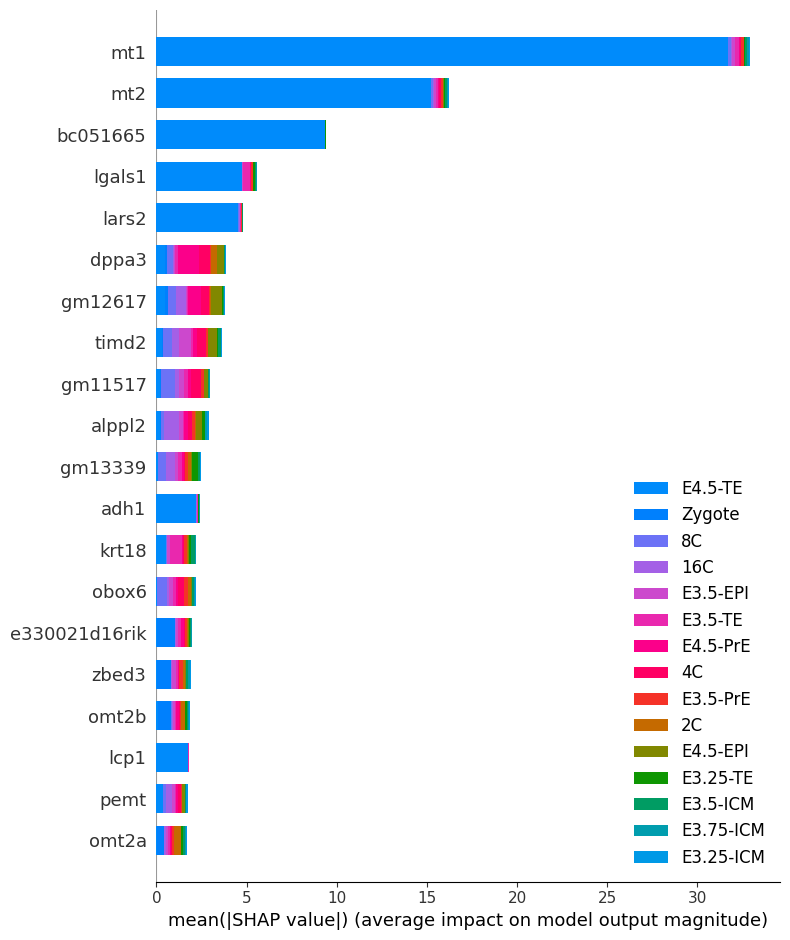

In [8]:
shap.summary_plot(
    shap_values, 
    e.test['X'], 
    feature_names=lvae.adata.var_names, 
    class_names=lvae.adata.obs.ct.cat.categories
)

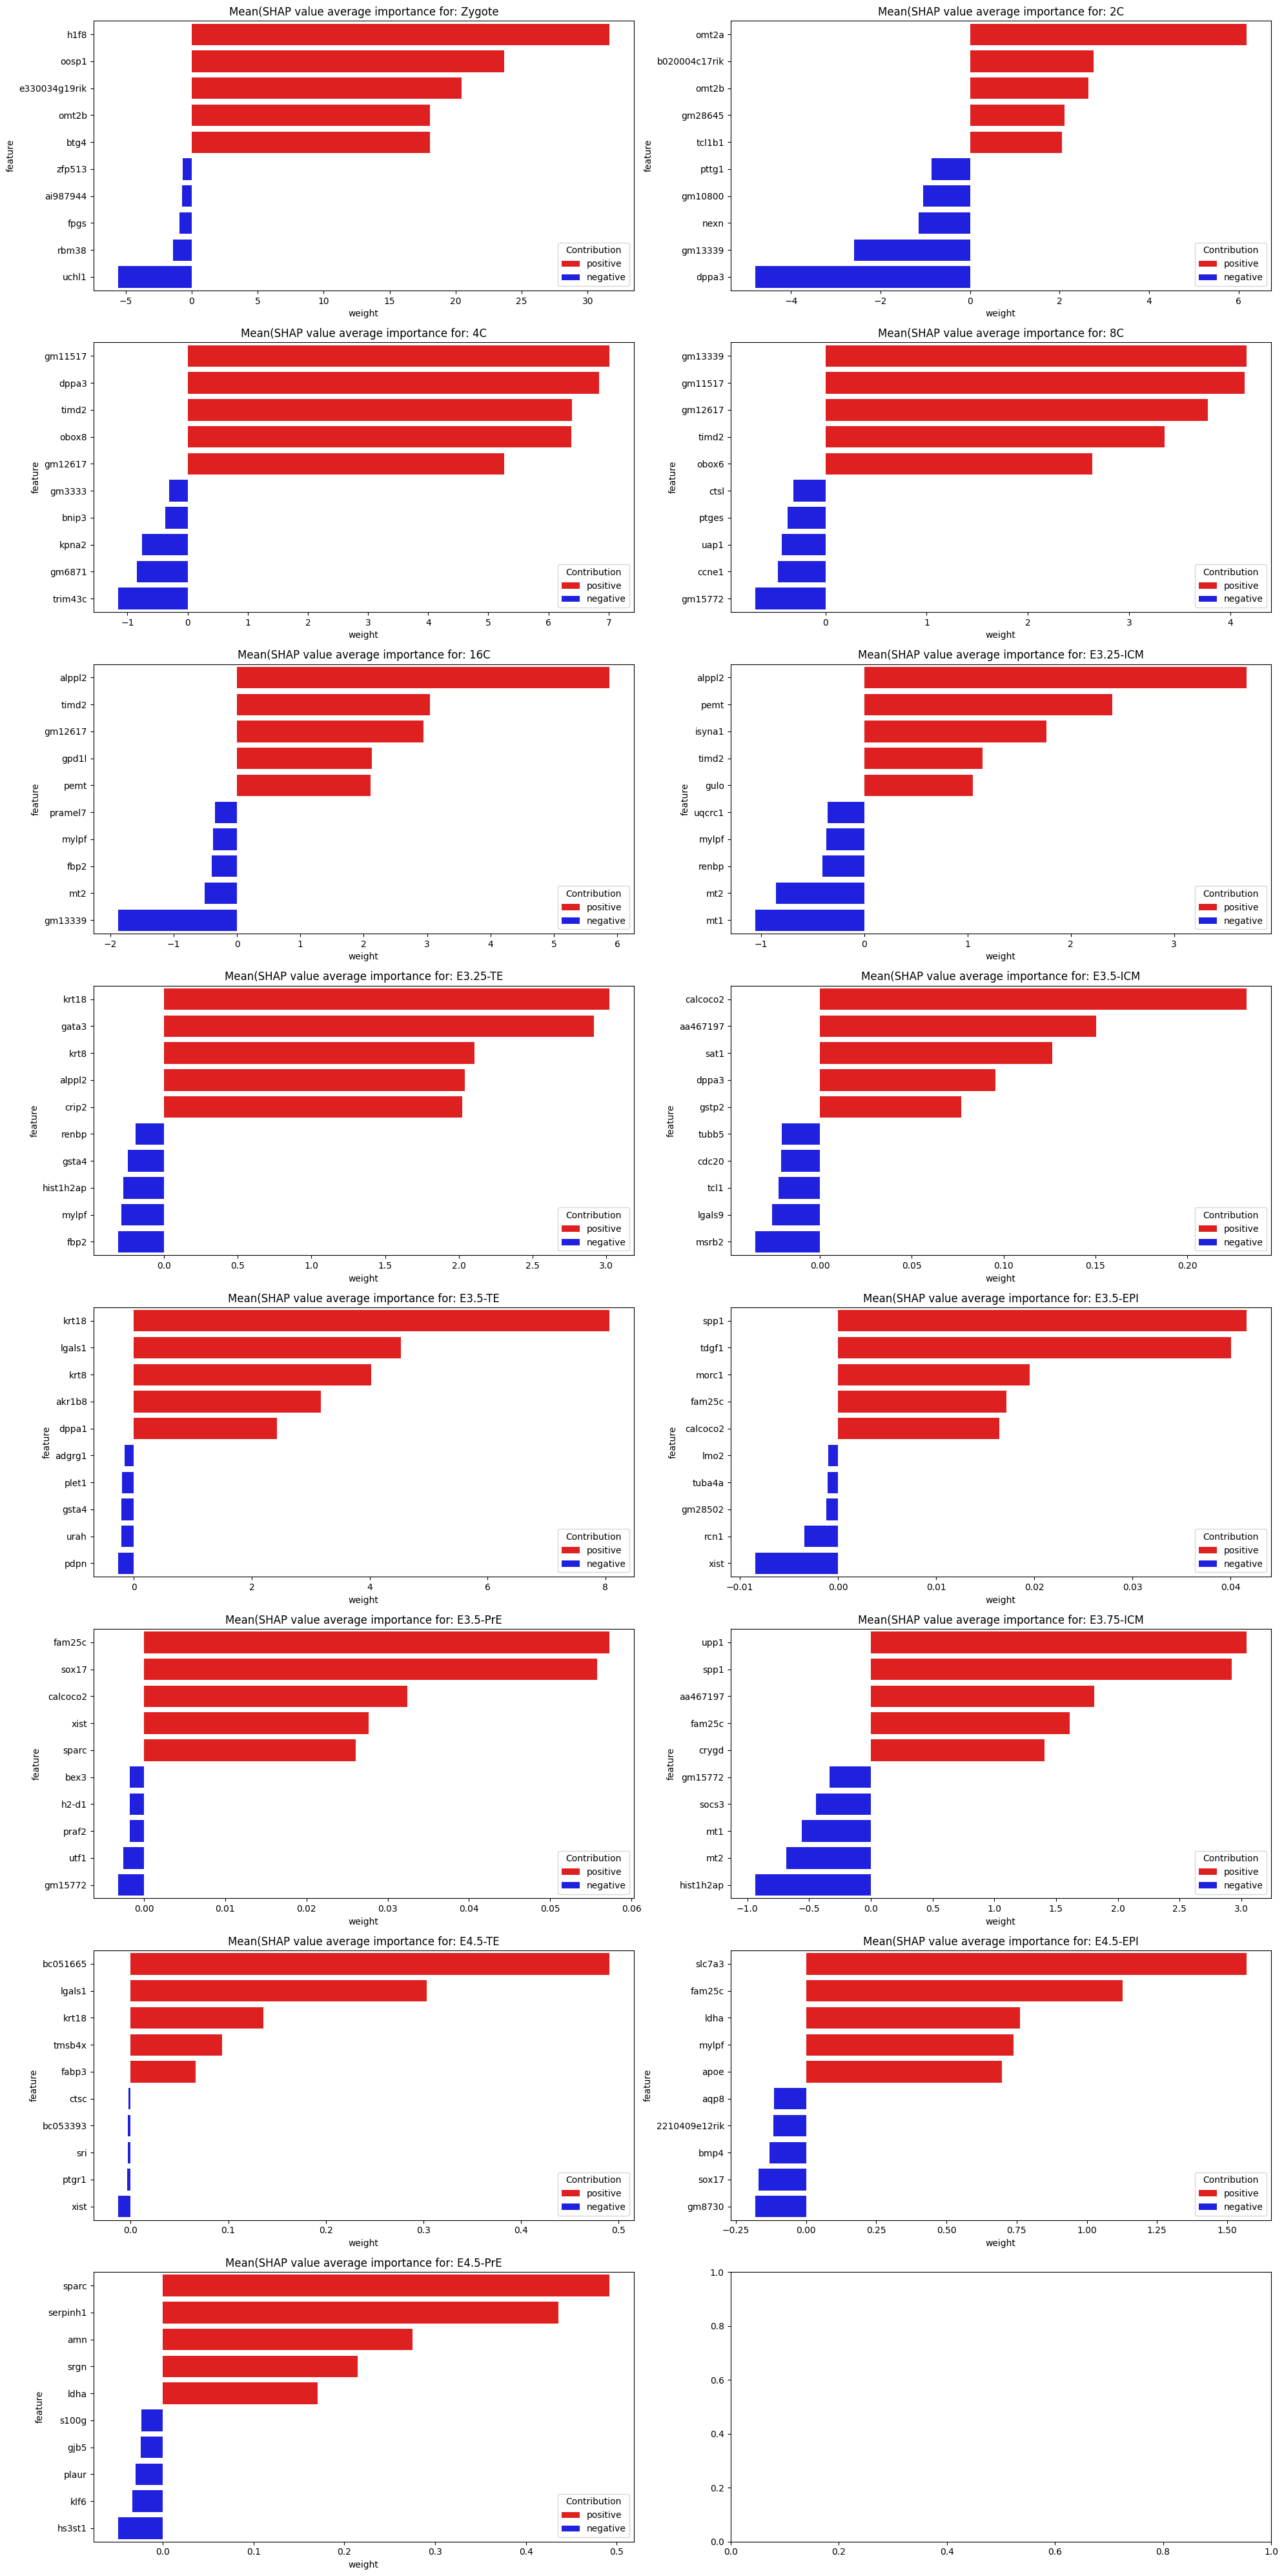

In [12]:
feature_plot(e, shap_values, subset=True, top_n=10)